In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
# Loading the dataset
salary_df=pd.read_csv('Dataset/Salary_Data.csv')


In [13]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


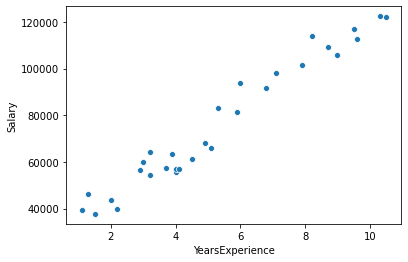

In [14]:
#Quick visualization of the data
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_df)

In [15]:
#Splitting the datasets
from sklearn.model_selection import train_test_split
X = salary_df.iloc[:,:-1].values 

Y = salary_df.iloc[:,1].values 
X_train,X_test,y_train,y_test=train_test_split(X, Y,test_size=0.2)

In [16]:
class LinearRegression:
    def __init__(self,alpha,iterations):
        self.alpha=alpha # learning rate
        self.iterations=iterations #number of iterations
        #initilizing weights and bias
        self.b0=0
        self.weights=np.zeros(X_train.shape[1])
    
    def cost_fuction(self,y_pred,y_train):
        cost=(y_pred-y_train)
        mean_sq_er=np.sum(np.array(cost))/len(y_pred)
        return mean_sq_er
    
    
    def fit(self,X_train,y_train):
        for i in range(0,self.iterations):
            #predicting the value using the value of weight and bias
            y_pred=self.b0+self.weights*X_train
            y_train=np.array(y_train).reshape(-1,1)
            
            #defining the cost function ie. mean squared error
            error=y_pred-y_train
            mean_sq_er = np.sum(error**2)
            mean_sq_er = mean_sq_er/len(X_train)
            
            #updating the weights using the gradient descent
            self.b0=self.b0-self.alpha*2*np.sum(error)/len(X_train)
            self.weights=self.weights-self.alpha*2*np.dot(np.array(X_train).T, (error))/len(X_train)
            
    def predict(self,X):
        # predicting the values for the X_test
        return self.b0+self.weights*X
    def r2(self,y_,y):
        sst = np.sum((y-np.array(y).mean())**2)
        ssr = np.sum((y_-y)**2)
        r2 = 1-(sst/ssr)
        return(r2)

In [17]:
lr=LinearRegression(0.01,1000)
res=lr.fit(X_train,y_train)

In [18]:
y_pred=lr.predict(X_test)
print("Predicted Values",y_pred)
print("Test Values",list(y_test))

Predicted Values [[ 54765.96627865]
 [ 51872.81155111]
 [ 54765.96627865]
 [116486.60046614]
 [ 92376.97773665]
 [ 75018.04937142]]
Test Values [64445.0, 56642.0, 54445.0, 112635.0, 98273.0, 83088.0]


In [19]:
print(lr.r2(y_pred,y_test))

0.9251326938499682


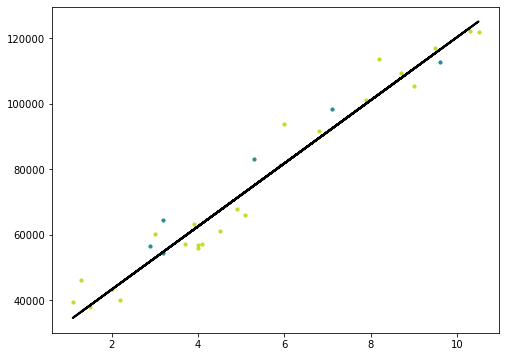

In [20]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X_train, lr.predict(X_train), color='black', linewidth=2, label="Prediction")
plt.show()